In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
plt.style.use('seaborn-talk')
from sklearn.linear_model import LinearRegression

In [2]:
df_GBP = pd.read_csv("exchangeGBP.csv", index_col='YYYY/MM/DD', parse_dates=True)

data = pd.read_csv('exchangeGBP.csv', parse_dates=True)
#shift+tab on oarse_date to see what it means
df_GBP.head()
data.head()

,YYYY/MM/DD,GBP/EUR
0,04/01/2010,0.89513
1,05/01/2010,0.89966
2,06/01/2010,0.89934
3,07/01/2010,0.89963
4,08/01/2010,0.89771


In [9]:
#data.info()
data = data.dropna(how='all')

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 0 to 499
Data columns (total 2 columns):
YYYY/MM/DD    500 non-null object
GBP/EUR       500 non-null float64
dtypes: float64(1), object(1)
memory usage: 11.7+ KB


In [10]:
#x = df_GBP['YYYY/MM/DD']
y = data['GBP/EUR']
x = np.arange(0, 500).reshape(-1, 1)
#pd.to_numeric(y, downcast='float')
#data['GBP/EUR'] = data[['GBP/EUR']].astype(int)

Text(0,0.5,'exchange rate')

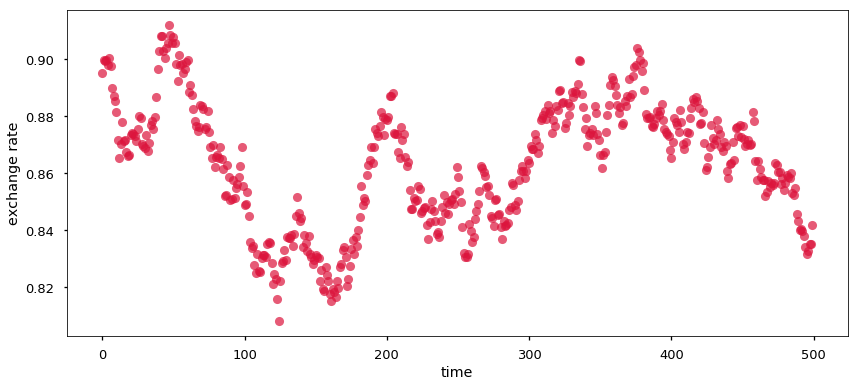

In [14]:
fig, ax = plt.subplots(figsize=(14, 6))
ax.plot(y, 'o', color='crimson', alpha=0.7)
ax.set_xlabel('time')
ax.set_ylabel('exchange rate')

In [15]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

model = make_pipeline(PolynomialFeatures(degree=10), LinearRegression())
model.fit(x, y.values)

Pipeline(memory=None,
     steps=[('polynomialfeatures', PolynomialFeatures(degree=10, include_bias=True, interaction_only=False)), ('linearregression', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))])

Pipeline(memory=None,
     steps=[('polynomialfeatures', PolynomialFeatures(degree=10, include_bias=True, interaction_only=False)), ('linearregression', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))])

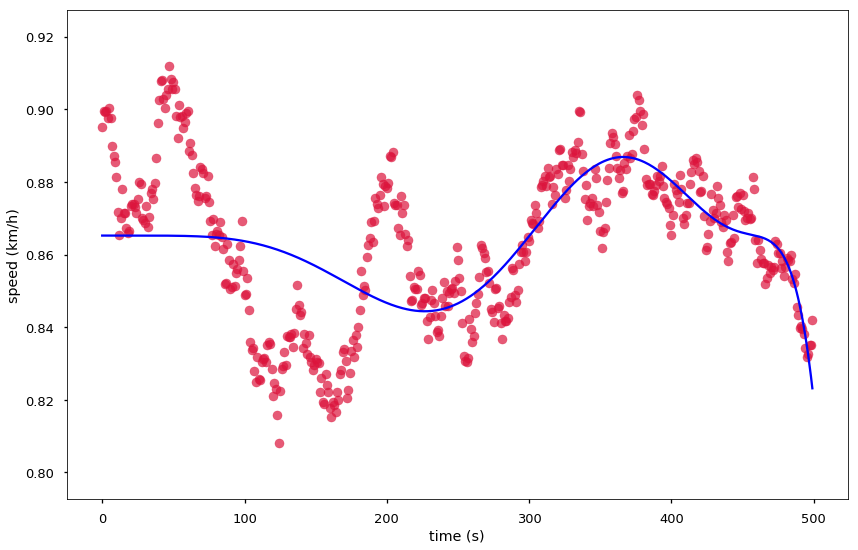

In [16]:
y_fit = model.predict(x)

fig, ax = plt.subplots(figsize=(14, 9))
ax.scatter(x, y, color='crimson', alpha=0.7)
ax.plot(x, y_fit, 'b-')#color='navy')
ax.set_xlabel('time (s)')
ax.set_ylabel('speed (km/h)')
model

# #Is degree 10 correct amount for the function? We don't know
#This is a case where out model underfits the data, i.e. our model has not enough complexity to 
model the complexity we see. We can also say that our model has too much bias about how the data looks.

Let us try with a big degree, e.g. 100.

Pipeline(memory=None,
     steps=[('polynomialfeatures', PolynomialFeatures(degree=50, include_bias=True, interaction_only=False)), ('linearregression', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))])

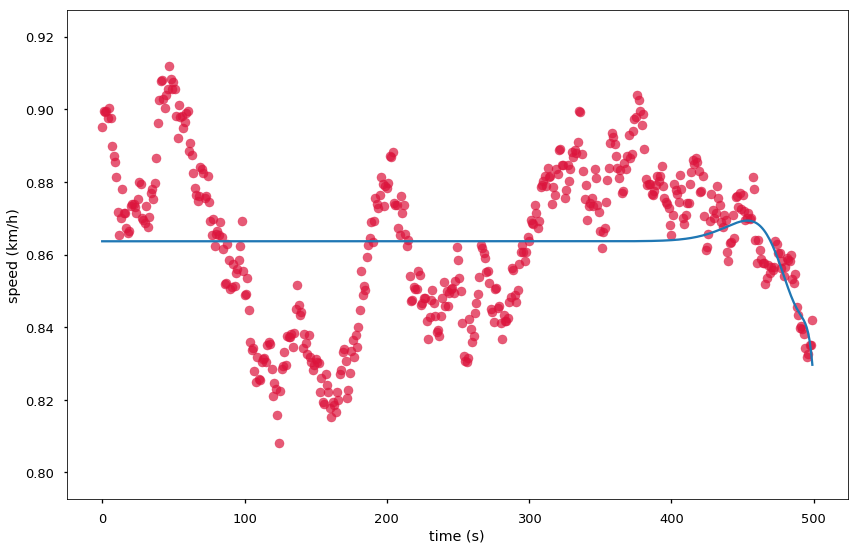

In [17]:
model = make_pipeline(PolynomialFeatures(degree=50), LinearRegression())
model.fit(x, y.values)
y_fit = model.predict(x)

fig, ax = plt.subplots(figsize=(14, 9))
ax.scatter(x, y, color='crimson', alpha=0.7)
ax.plot(x, y_fit, )#color='navy')
ax.set_xlabel('time (s)')
ax.set_ylabel('speed (km/h)')
model

This is a typical overfit of the model. So we need to find the correct polynomial degree of our function
The method to do this is a grid search algorithm, which will perform the training and cross-validating of our model for all hyperparameter values given to it.

In [18]:
from sklearn.model_selection import GridSearchCV

model = make_pipeline(PolynomialFeatures(degree=5), LinearRegression())
grid = GridSearchCV(model,
                    {'polynomialfeatures__degree': list(range(5, 101))},
                    cv=5)
grid

GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('polynomialfeatures', PolynomialFeatures(degree=5, include_bias=True, interaction_only=False)), ('linearregression', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'polynomialfeatures__degree': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

(Pipeline(memory=None,
      steps=[('polynomialfeatures', PolynomialFeatures(degree=5, include_bias=True, interaction_only=False)), ('linearregression', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))]),
 0.8894313547835384,
 array([ 0.00000000e+00,  7.15150234e-05, -8.74445445e-06,  5.76822639e-08,
        -1.28093836e-10,  9.27577628e-14]))

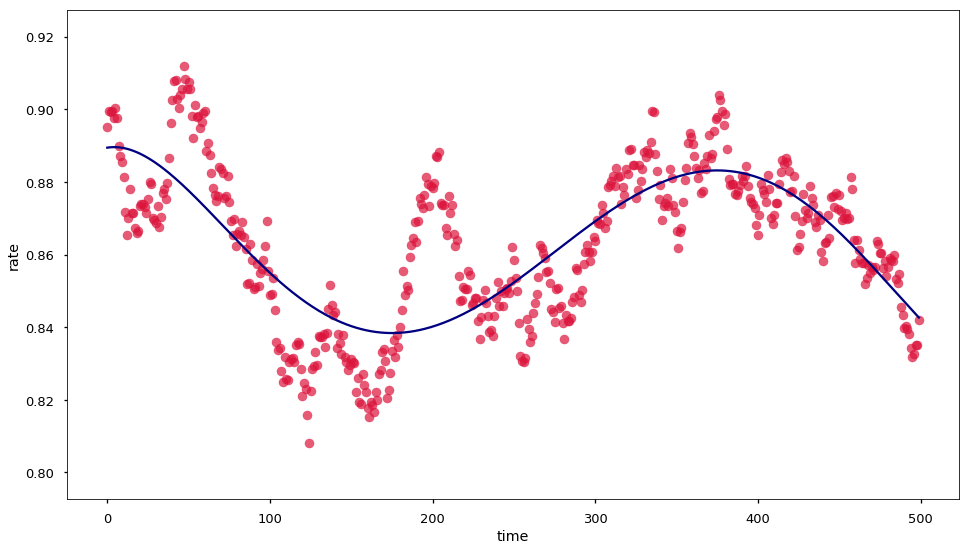

In [19]:
grid.fit(x, y)

best = grid.best_estimator_
#xfit = np.linspace(0, 30, 3000)
yfit = best.predict(x)
fig, ax = plt.subplots(figsize=(16, 9))
ax.scatter(x, y, color='crimson', alpha=0.7)
ax.plot(x, yfit, color='navy')
ax.set(xlabel='time', ylabel='rate')
best, best.named_steps.linearregression.intercept_, best.named_steps.linearregression.coef_

In [20]:
grid.best_score_

-18.520248375635624

This is not a good regression either. So what went wrong? 
Let's try Regularisation techniques of sklearn. Ridge and Lasso.

For degrees more than 50, ridge model threw and error:
ValueError: array must not contain infs or NaNs
np.isnan(x).any()
np.isnan(y).any()
np.isinf(x).any()
np.isinf(y).any()
all came back false, so I had to reduce the degrees to 50

/Users/buketkonuk/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  import sys
/Users/buketkonuk/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/Users/buketkonuk/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  # Remove the CWD from sys.path while we load stuff.


SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=None, n_iter=None, penalty='l2',
       power_t=0.25, random_state=None, shuffle=True, tol=None, verbose=0,
       warm_start=False)

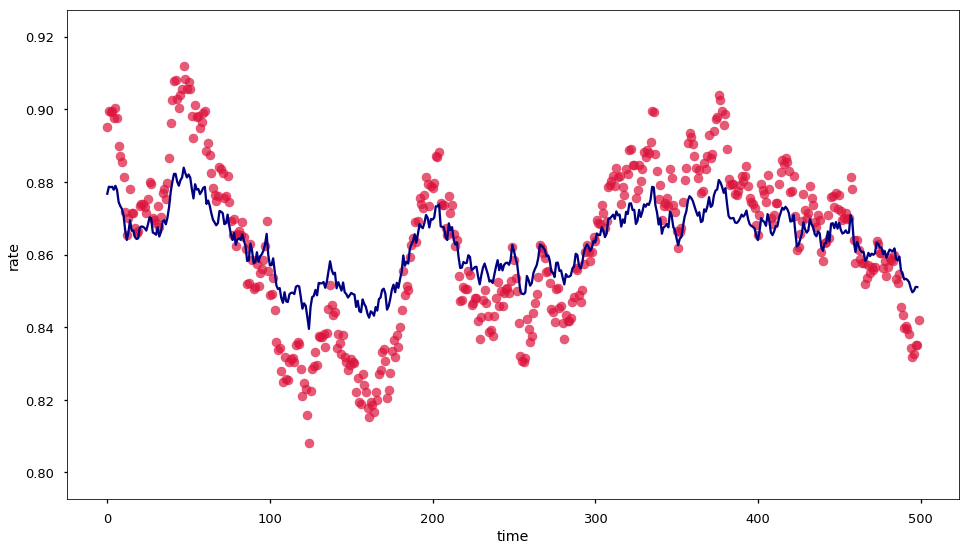

In [21]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.linear_model import SGDRegressor
#ridge
# model = make_pipeline(PolynomialFeatures(degree=50), Ridge(alpha=5.0, tol=0.01, max_iter=300000))
# model = make_pipeline(PolynomialFeatures(degree=100), Lasso(alpha=10.0, tol=0.01, max_iter=300000))
model = SGDRegressor()
model.fit(xx.reshape(-1, 1), yy)

#xfit = np.linspace(0, 30, 3000)
yfit = model.predict(xx.reshape(-1, 1))

fig, ax = plt.subplots(figsize=(16, 9))
ax.scatter(x, y, color='crimson', alpha=0.7)

ax.plot(x[:-1], yfit, color='navy')

ax.set(xlabel='time', ylabel='rate')
model
# model.named_steps.ridge.intercept_
# model.named_steps.ridge.coef_

This looks like a better fit. Next, I'll try ElasticNet 

/Users/buketkonuk/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """
/Users/buketkonuk/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  


ElasticNet(alpha=0.0001, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=True, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

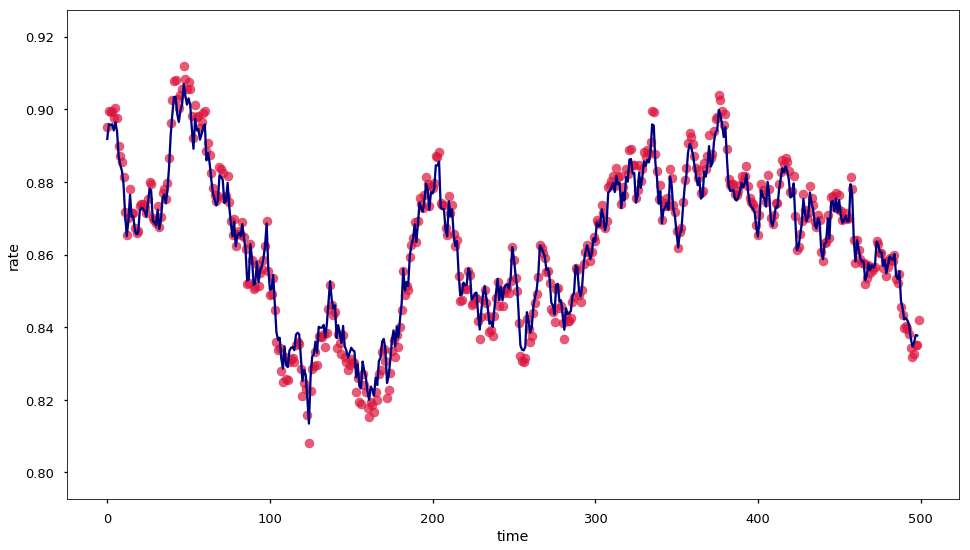

In [22]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.linear_model import ElasticNet

model = ElasticNet(alpha=0.0001, normalize=True)
model.fit(xx.reshape(-1, 1), yy)

#xfit = np.linspace(0, 30, 3000)
yfit = model.predict(xx.reshape(-1, 1))

fig, ax = plt.subplots(figsize=(16, 9))
ax.scatter(x, y, color='crimson', alpha=0.7)

ax.plot(x[:-1], yfit, color='navy')

ax.set(xlabel='time', ylabel='rate')
model
# model.named_steps.ridge.intercept_
# model.named_steps.ridge.coef_

This model Looks like aperfect fit!!